# Classificação de Texto com Métodos Ensemble

## Métodos Ensemble

<p align="justify"> Na aula passada, vimos como usar o Decision Trees e SVMs para a classificação de textos. Vimos também que Decision Trees, apesar de fáceis de interpretar, não são muito competitivos em termos de perfomance. SVMs, apesar de mais competitivos no geral, não são muito utilizados na classificação de texto pela rigidez do hiperplano e nem sempre ser possível separar os dados desta forma.

<p align="justify"> Agora, iremos ver alguns métodos <i>ensemble</i> que podem ser utilizados para a melhoria da capacidade de predição dos modelos. Métodos ensemble, em aprendizado de máquina, são técnicas que combinam as previsões de vários modelos individuais (chamados de "modelos base") para melhorar o desempenho preditivo e a estabilidade do modelo.

O ISLP define esses métodos como aqueles que "*combine many simple 'building block' models in order to obtain a single and potentially very powerful model. these simple building block models are sometimes known as weak learner, since they may lead to mediocre predictions on their own.*" (ISLP, p. 343). A ideia central por trás dos métodos ensemble é que a combinação de várias "opiniões" (diferentes modelos) geralmente leva a um resultado mais preciso e robusto do que qualquer modelo individual. Esses métodos são amplamente utilizados em problemas de classificação, regressão e até mesmo em tarefas de detecção de anomalias. Aqui estão algumas das técnicas de ensemble mais comuns:

* <p align="justify"> <b>Bagging (Bootstrap Aggregating)</b>: O Bagging envolve treinar múltiplos modelos base, geralmente do mesmo tipo, em subamostras do conjunto de treinamento original. As previsões desses modelos base são agregadas para obter uma previsão final, geralmente através da média (em regressão) ou votação (em classificação).

* <p align="justify"> <b> Random Forest</b>: O Random Forest é uma variação do Bagging que se baseia no uso de árvores de decisão como modelos base. Ele utiliza subamostras bootstrap para criar múltiplas árvores de decisão e combina suas previsões por meio de votação.

* <p align="justify"> <b> Boosting</b>: O Boosting é uma técnica de ensemble que visa melhorar a precisão do modelo, dando mais peso aos exemplos que foram previamente classificados incorretamente. Algoritmos populares de Boosting incluem o AdaBoost, o Gradient Boosting, e o XGBoost. O Boosting cria um conjunto de modelos em que cada modelo subsequente é ajustado para corrigir os erros do modelo anterior.

* <p align="justify"> <b> Stacking</b>: Stacking envolve o treinamento de vários modelos base e, em seguida, um modelo meta (também chamado de meta-classificador ou meta-regressor) é treinado para combinar as previsões dos modelos base. Essa técnica permite que os modelos base e o modelo meta sejam de tipos diferentes.

* <p align="justify"> <b> Voting (Ensemble de votação)</b>: Nesse método, vários modelos são treinados independentemente no mesmo conjunto de dados, e a previsão final é obtida por votação (em problemas de classificação) ou média (em problemas de regressão) das previsões dos modelos individuais.


<p align="justify"> Os métodos ensemble são eficazes para melhorar o desempenho e a robustez de modelos de aprendizado de máquina, especialmente quando aplicados a problemas complexos ou com dados ruidosos. A escolha do método de ensemble apropriado depende das características do problema e dos modelos base disponíveis. Cada técnica de ensemble tem suas próprias vantagens e desvantagens, e a seleção depende da necessidade específica do projeto.

### Voting Classifiers

<p align="justify"> Os voting classifiers combinam previsões de múltiplos modelos (classificadores) para aumentar a precisão de uma tarefa de classificação. Em vez de confiar em apenas um modelo, eles agregam os resultados de vários classificadores, o que tende a melhorar a robustez e a precisão do sistema de predição. Existem dois tipos principais de voting classifiers: votação majoritária (ou hard voting) e votação ponderada por probabilidade (ou soft voting).

<p align="justify"> <b> Hard Voting </b> (Votação Majoritária): Cada modelo individual faz uma predição e o voto mais frequente entre os modelos é escolhido como a decisão final. Por exemplo, se três modelos preveem "classe A" e dois preveem "classe B", a decisão final é "classe A".

<p align="justify"> <b> Soft Voting </b> (Votação Ponderada): Em vez de considerar apenas o voto final, cada modelo retorna uma probabilidade para cada classe. O voting classifier então calcula a média dessas probabilidades e escolhe a classe com a maior probabilidade média como predição final. Esse método é geralmente mais eficaz quando os modelos subjacentes são bem calibrados.


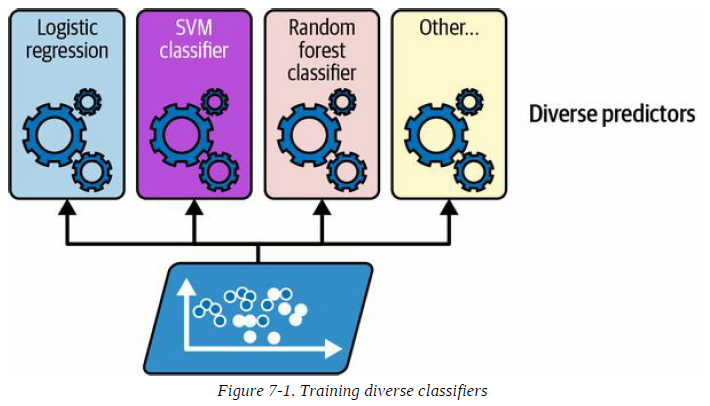

* Vantagens dos Voting Classifiers

1. Redução de Variância e Bias: Como combina múltiplos modelos, o voting classifier ajuda a balancear vieses e variâncias de classificadores individuais, especialmente se os modelos são diversificados (por exemplo, redes neurais, árvores de decisão e regressão logística).

2. Melhoria na Precisão: A precisão pode aumentar consideravelmente quando os modelos subjacentes têm bom desempenho. O uso do soft voting, especialmente, tende a melhorar a taxa de acertos em comparação com classificadores individuais.

3. Robustez e Estabilidade: Voting classifiers são menos propensos a cometer erros graves, uma vez que modelos diferentes podem corrigir previsões incorretas uns dos outros. Isso também ajuda a estabilizar a performance do sistema em diferentes conjuntos de dados.

4. Flexibilidade: Eles permitem a combinação de modelos diferentes, o que pode ser vantajoso se os modelos têm pontos fortes complementares (por exemplo, um modelo pode ser bom em capturar relacionamentos lineares, enquanto outro lida melhor com não-linearidades).

* Desvantagens dos Voting Classifiers


1. Complexidade Computacional: Combinar vários modelos aumenta o tempo e o custo computacional, pois cada modelo precisa ser treinado e aplicado na previsão. Isso pode ser problemático para conjuntos de dados muito grandes ou sistemas de tempo real.

2. Dependência da Qualidade dos Modelos Individuais: Se os classificadores subjacentes forem fracos, o desempenho geral pode ser prejudicado. Voting classifiers não corrigem classificadores de baixa qualidade; em vez disso, amplificam a predição coletiva dos modelos.

3. Necessidade de Diversidade dos Modelos: Voting classifiers funcionam melhor com modelos que têm abordagens complementares. Se todos os modelos forem muito parecidos (por exemplo, todos forem árvores de decisão com parâmetros similares), o ganho na precisão pode ser mínimo.

4. Dificuldade em Ajustar Pesos (no Soft Voting): Determinar os pesos ideais para cada modelo no soft voting pode ser complexo, e atribuir pesos errados pode prejudicar a acurácia final.

Em resumo, voting classifiers são uma técnica poderosa para aumentar a precisão e estabilidade dos modelos de classificação, mas exigem modelos bem ajustados e diversificados para alcançar bons resultados, com uma demanda computacional considerável dependendo da quantidade de classificadores empregados.

Vamos aos exemplos utilizando nosso banco de dados de tweets, focando na classificação de relevância.

In [1]:
import pandas as pd

caminho = 'https://github.com/NUPRAM/CoViD-Pol/raw/main/Covid-Pol_Corpus_v2.0.csv'

df_ex = pd.read_csv(caminho)

df_ex.head()

,Unnamed: 0,id,tweet_id,post_date,content,relevant,final_stance,final_sentiment,final_children
0,0,523,A522,2020-09-15,A cabeça pensa onde o pé pisa. Quem governa de...,True,favorable,negative,true
1,1,458,A457,2020-11-20,Sarto vai fazer um grande Programa de Enfrenta...,True,favorable,positive,false
2,2,446,A445,2020-12-18,A Câmara dos Deputados votou hoje a MP que tra...,True,favorable,negative,false
3,3,547,A546,2020-11-10,Tirar Bolsonaro do poder é uma questão de vida...,True,favorable,negative,false
4,4,848,A847,2020-09-24,E a LIESA decidiu adiar os desfiles do #Carnav...,True,favorable,negative,false


De forma geral, sempre é recomendado processar a coluna de texto

In [2]:
import re

# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex["texto_processado"] = df_ex['content'].apply(preprocess_text)

Já vamos dividir em treino e teste

In [4]:
from sklearn.model_selection import train_test_split

texto = df_ex['texto_processado']
target = df_ex['relevant']

X_treino, X_teste, y_treino, y_teste = train_test_split(texto,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

Vamos transformar o texto em TF-IDF e tirar as stopwords

In [5]:
# Importando o vetorizador do SKlearn

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Definindo o dicionário de stop_words
stop_words = stopwords.words('portuguese')

# Criando o vetorizador, utilizando nossa lista de stop_words

tfidf_vectorizer = TfidfVectorizer(stop_words = stop_words)

# Vetorizando o texto com TF_IDF

X_treino_vetorizado = tfidf_vectorizer.fit_transform(X_treino)

# Imprimindo o Tf-idf do primeiro tweet
print(X_treino_vetorizado[:1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 19839)>
  Coords	Values
  (0, 19213)	0.25366545665179163
  (0, 3655)	0.14726178869258233
  (0, 9390)	0.20783392030028983
  (0, 8045)	0.26636706244580877
  (0, 1924)	0.2594356827674991
  (0, 11579)	0.22478055869685312
  (0, 12531)	0.2464933717087138
  (0, 13386)	0.22841982319157667
  (0, 12250)	0.1599498356775102
  (0, 16765)	0.10383345048121786
  (0, 18879)	0.15707679596051222
  (0, 18497)	0.16232033742637092
  (0, 13484)	0.18607414458138316
  (0, 4453)	0.2594356827674991
  (0, 4684)	0.210016186892773
  (0, 13281)	0.18645164632480002
  (0, 13256)	0.20026757668060308
  (0, 19588)	0.2464933717087138
  (0, 1975)	0.26636706244580877
  (0, 18134)	0.2310781395706771
  (0, 11973)	0.27504773062728144


Vamos checar as palavras mais importantes no banco de treinamento

In [6]:
import numpy as np

# Pegando as palavras do vocabulário gerado pelo TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()

# Convertendo toda a matriz esparsa em uma array densa
tfidf_values = X_treino_vetorizado.toarray()

# Calculando a média dos valores TF-IDF para cada palavra (ao longo dos documentos)
mean_tfidf_values = np.mean(tfidf_values, axis=0)

# Criando um DataFrame para associar palavras e seus valores médios de TF-IDF
df_tfidf = pd.DataFrame({"Word": words, "Mean_TF-IDF": mean_tfidf_values})

# Ordenando as palavras pelo valor médio de TF-IDF
df_tfidf_sorted = df_tfidf.sort_values(by="Mean_TF-IDF", ascending=False)

# Exibindo as 20 palavras mais relevantes em todo o conjunto de treino
print(df_tfidf_sorted.head(20))

            Word  Mean_TF-IDF
18921     vacina     0.024751
19012  vacinação     0.022117
4785       covid     0.020262
4514      contra     0.018928
16765         sa     0.015412
2539   bolsonaro     0.013749
1153        anos     0.013266
6484        dose     0.012612
14142    pessoas     0.011737
2649      brasil     0.011341
18991    vacinas     0.011183
6056         dia     0.011071
4859    crianças     0.010972
9426        hoje     0.010799
9099     governo     0.010320
18267      todos     0.009426
17406      sobre     0.009021
6486       doses     0.008954
13566   pandemia     0.008825
19099      vamos     0.008728


E a distribuição de classes

In [7]:
y_treino.value_counts()

,count
relevant,
True,4753
False,2643


In [8]:
y_teste.value_counts()

,count
relevant,
True,1209
False,640


Por fim, podemos observar a distribuição de palavras graficamente.

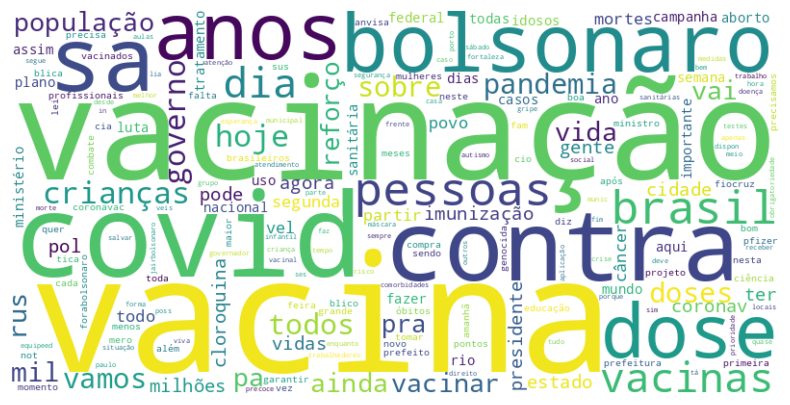

In [9]:
from wordcloud import WordCloud # Biblioteca
import matplotlib.pyplot as plt

# Criando um dicionário com as palavras e seus valores de TF-IDF para a nuvem de palavras
word_tfidf_dict = dict(zip(df_tfidf["Word"], df_tfidf["Mean_TF-IDF"]))

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict)

# Exibindo a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Vamos agora fazer um voting classifier com modelos que vimos até agora: Regressão Logística, Decision Trees e SVM.

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Temos de vetorizar o teste usando vectorizer.transform

X_teste_vetorizado = tfidf_vectorizer.transform(X_teste)


# Definindo os classificadores base
clf1 = LogisticRegression(random_state=42, max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)  # Necessário probability=True para VotingClassifier por que o SVM não tem probabilidade na versão padrão

# Criando o Voting Classifier (votação 'hard' ou 'soft')
# 'hard' usa a maioria das previsões, 'soft' usa as probabilidades e calcula média
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('svc', clf3)
], voting='soft', n_jobs=-1)

# Treinando o Voting Classifier
voting_clf.fit(X_treino_vetorizado, y_treino)

# Realizando previsões no conjunto de teste
y_pred = voting_clf.predict(X_teste_vetorizado)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))


Acurácia: 0.9621416982152515
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.95      0.94      0.95       640
        True       0.97      0.97      0.97      1209

    accuracy                           0.96      1849
   macro avg       0.96      0.96      0.96      1849
weighted avg       0.96      0.96      0.96      1849



Com os modelos na sua forma padrão, sem nenhum grid search, obtivemos um F1-Macro de 0.96, um excelente resultado. No entanto, não fizemos cross-validation para verificar a distribuição dos valores



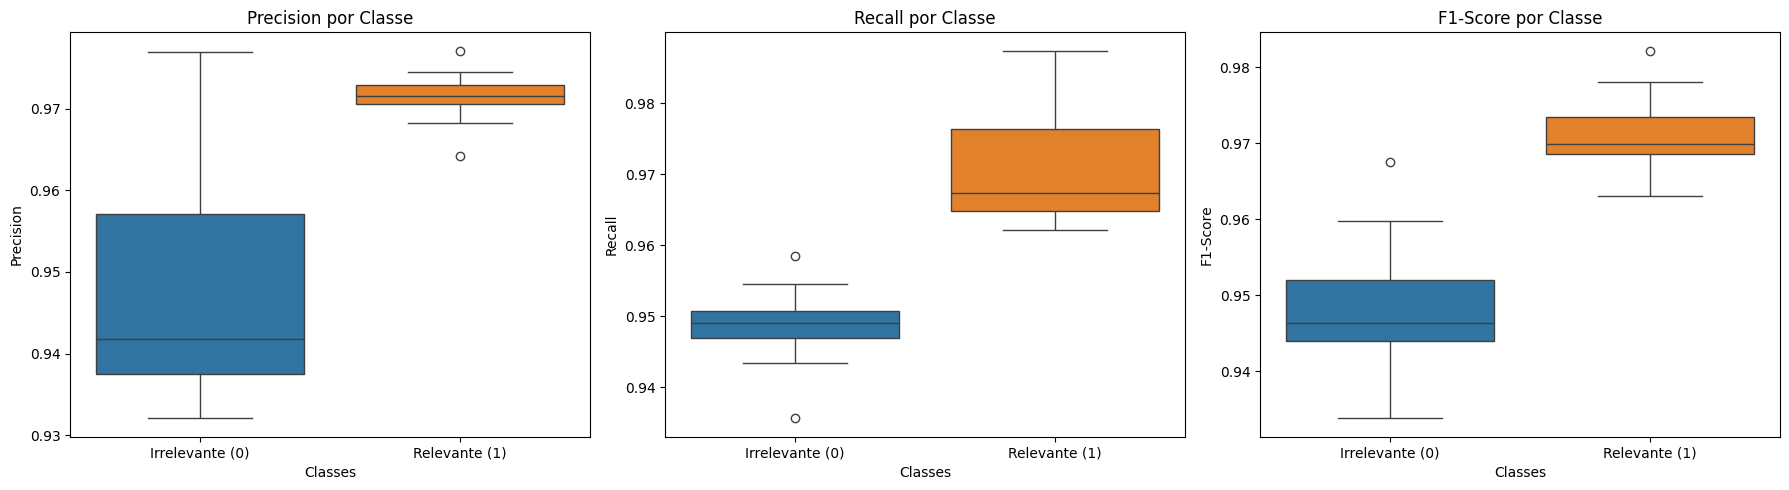

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Definindo os classificadores base
clf1 = LogisticRegression(random_state=42, max_iter=1000)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42)

# Criando o Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('svc', clf3)
], voting='soft', n_jobs=-1)

# Definindo o K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializando listas para armazenar as métricas
precision_list = []
recall_list = []
f1_list = []

# Inicializando a variável para armazenar o melhor modelo
best_model = None
best_f1_score = 0

# Executando K-Fold Cross Validation
for train_index, test_index in kf.split(X_treino_vetorizado, y_treino):
    X_train, X_valid = X_treino_vetorizado[train_index], X_treino_vetorizado[test_index]
    y_train, y_valid = y_treino.iloc[train_index], y_treino.iloc[test_index]  # Usando .iloc para indexação

    # Treinando o modelo
    voting_clf.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = voting_clf.predict(X_valid)

    # Calculando as métricas
    precision = precision_score(y_valid, y_pred, average=None)
    recall = recall_score(y_valid, y_pred, average=None)
    f1 = f1_score(y_valid, y_pred, average=None)

    # Armazenando os resultados
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Calculando a média do F1-score e atualizando o melhor modelo se necessário
    avg_f1_score = np.mean(f1)
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_model = voting_clf # Salvando o melhor modelo para prever no banco de teste

# Convertendo as listas em DataFrames
precision_df = pd.DataFrame(precision_list, columns=['Irrelevante (0)', 'Relevante (1)'])
recall_df = pd.DataFrame(recall_list, columns=['Irrelevante (0)', 'Relevante (1)'])
f1_df = pd.DataFrame(f1_list, columns=['Irrelevante (0)', 'Relevante (1)'])

# Plotando os boxplots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=precision_df)
plt.title('Precision por Classe')
plt.xlabel('Classes')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
sns.boxplot(data=recall_df)
plt.title('Recall por Classe')
plt.xlabel('Classes')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
sns.boxplot(data=f1_df)
plt.title('F1-Score por Classe')
plt.xlabel('Classes')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()


Durante o loop, salvamos o melhor modelo (em termos de F1-Macro). Agora, podemos utilizar este modelo para as predições no banco de teste.

In [15]:
# Previsões no conjunto de teste
y_pred = best_model.predict(X_teste_vetorizado)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

Acurácia: 0.9594375338020552
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94       640
        True       0.97      0.97      0.97      1209

    accuracy                           0.96      1849
   macro avg       0.96      0.96      0.96      1849
weighted avg       0.96      0.96      0.96      1849



Podemos ver que os resultados para cada uma das classes são parecidos com a variação encontrada no k-fold. Não parece haver um overfitting durante o treinamento, e temos ótimos resultados utilizando somente os modelos na forma como "saem de fábrica". Vamos tentar agora um gridsearch para cada um dos modelos, e aplicar o melhor de cada modelo dentro de um voting classifier [Vai demorar para rodar].

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definindo os parâmetros para cada modelo
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Grid Search para cada modelo
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='f1_macro')
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_macro')
grid_svc = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svc, cv=5, scoring='f1_macro')

# Treinando o Grid Search para cada modelo
grid_lr.fit(X_treino_vetorizado, y_treino)
grid_dt.fit(X_treino_vetorizado, y_treino)
grid_svc.fit(X_treino_vetorizado, y_treino)

# Pegando os melhores estimadores de cada modelo
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_svc = grid_svc.best_estimator_

print("Melhores parâmetros para Regressão Logística:", grid_lr.best_params_)
print("Melhores parâmetros para Decision Tree:", grid_dt.best_params_)
print("Melhores parâmetros para SVM:", grid_svc.best_params_)

# Criando o Voting Classifier com os melhores estimadores
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('dt', best_dt),
    ('svc', best_svc)
], voting='soft')

# Treinando o Voting Classifier
voting_clf.fit(X_treino_vetorizado, y_treino)

# Realizando previsões no conjunto de teste
y_pred = voting_clf.predict(X_teste_vetorizado)

# Avaliando o modelo
print("Acurácia do Voting Classifier:", accuracy_score(y_teste, y_pred))
print("Relatório de Classificação do Voting Classifier:\n", classification_report(y_teste, y_pred))

Melhores parâmetros para Regressão Logística: {'C': 10, 'solver': 'lbfgs'}
Melhores parâmetros para Decision Tree: {'max_depth': None, 'min_samples_split': 5}
Melhores parâmetros para SVM: {'C': 1, 'kernel': 'linear'}
Acurácia do Voting Classifier: 0.9599783666846944
Relatório de Classificação do Voting Classifier:
               precision    recall  f1-score   support

       False       0.94      0.95      0.94       640
        True       0.97      0.97      0.97      1209

    accuracy                           0.96      1849
   macro avg       0.96      0.96      0.96      1849
weighted avg       0.96      0.96      0.96      1849



Poderíamos fazer também um k-fold aqui para verificar a variação ao longo do treinamento. No entanto, para economizarmos tempo, vamos só concluir que temos um resultado parecido com o voting classifier, sem grandes ganhos. Se achar interessante, crie aqui uma célula de código e faça um k-fold com o voting_clf utilizando os melhores parâmetros (ou refaça com uma maior quantidade de parâmetros). Lembre-se que isso sempre aumentará o tempo de execução.

### Bagging

<p align="justify"> Bagging (Bootstrap Aggregating) é uma técnica de aprendizado de máquina que melhora a estabilidade e a precisão de algoritmos de aprendizado de máquina. Ela é especialmente eficaz em modelos de aprendizado que têm alta variabilidade, como árvores de decisão.

O que é o Bagging? Ele consiste nos seguintes passos principais:

1. <p align="justify"> Amostragem com Reposição: O conjunto de dados original é amostrado várias vezes com reposição, criando subconjuntos de dados. Isso significa que algumas observações podem ser selecionadas várias vezes, enquanto outras podem não ser escolhidas em uma amostra.

2. <p align="justify"> Treinamento de Vários Modelos: Para cada subconjunto gerado, um modelo (normalmente do mesmo tipo) é treinado. Por exemplo, se estamos usando árvores de decisão, várias árvores são treinadas em diferentes subconjuntos de dados.

3. <p align="justify"> Agregação de Resultados: As previsões dos modelos individuais são então combinadas para fazer a previsão final. Para problemas de classificação, geralmente é feito um voto majoritário, enquanto para problemas de regressão, a média das previsões é calculada.


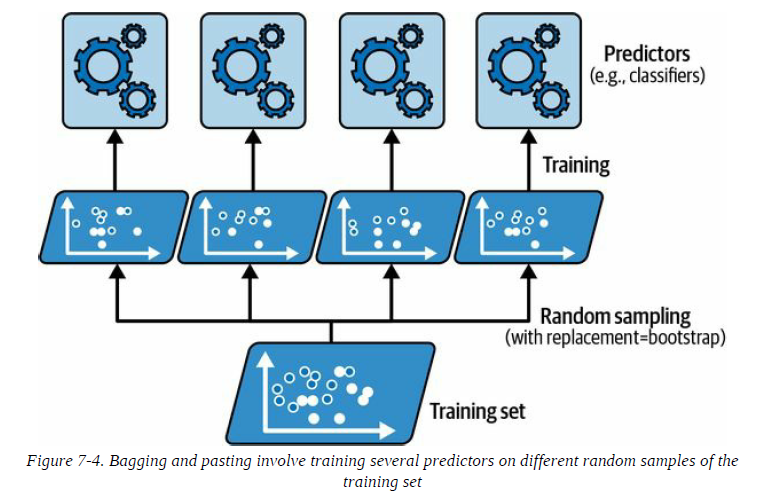

Vamos direto para a classificação utilizando ele

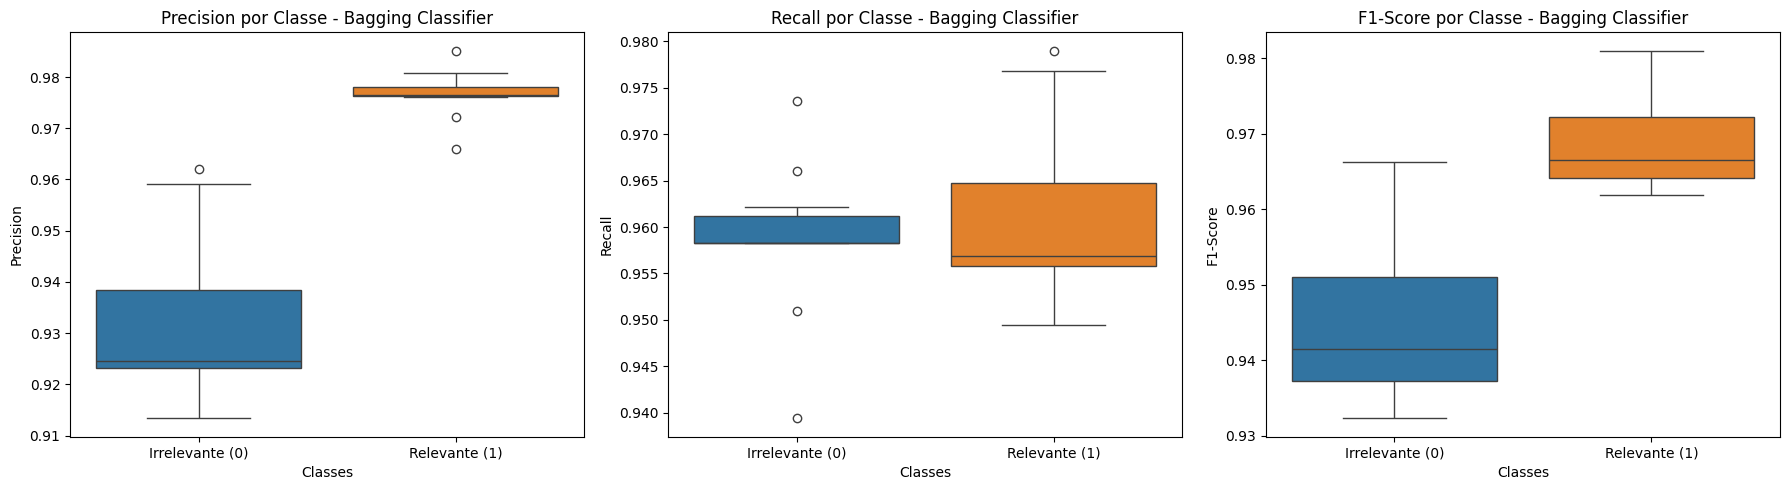

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo o classificador base (árvore de decisão)
base_clf = DecisionTreeClassifier(random_state=42)

# Criando o modelo de Bagging
bagging_clf = BaggingClassifier(base_clf, n_estimators = 50, random_state=42) # 50 estimators para reduzir o tempo de processamento

# Definindo o K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializando listas para armazenar as métricas
precision_list = []
recall_list = []
f1_list = []

# Inicializando a variável para armazenar o melhor modelo
best_model = None
best_f1_score = 0

# Executando K-Fold Cross Validation
for train_index, test_index in kf.split(X_treino_vetorizado, y_treino):
    X_train, X_valid = X_treino_vetorizado[train_index], X_treino_vetorizado[test_index]
    y_train, y_valid = y_treino.iloc[train_index], y_treino.iloc[test_index]  # Usando .iloc para indexação

    # Treinando o modelo
    bagging_clf.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = bagging_clf.predict(X_valid)

    # Calculando as métricas
    precision = precision_score(y_valid, y_pred, average=None)
    recall = recall_score(y_valid, y_pred, average=None)
    f1 = f1_score(y_valid, y_pred, average=None)

    # Armazenando os resultados
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Calculando a média do F1-score e atualizando o melhor modelo se necessário
    avg_f1_score = np.mean(f1)
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_model = bagging_clf  # Salvando o melhor modelo para prever no banco de teste


# Convertendo as listas em DataFrames
precision_df = pd.DataFrame(precision_list, columns=['Irrelevante (0)', 'Relevante (1)'])
recall_df = pd.DataFrame(recall_list, columns=['Irrelevante (0)', 'Relevante (1)'])
f1_df = pd.DataFrame(f1_list, columns=['Irrelevante (0)', 'Relevante (1)'])

# Plotando os boxplots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=precision_df)
plt.title('Precision por Classe - Bagging Classifier')
plt.xlabel('Classes')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
sns.boxplot(data=recall_df)
plt.title('Recall por Classe - Bagging Classifier')
plt.xlabel('Classes')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
sns.boxplot(data=f1_df)
plt.title('F1-Score por Classe - Bagging Classifier')
plt.xlabel('Classes')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()

Vamos utilizar o melhor modelo para as predições no banco de teste

In [18]:
# Previsões no conjunto de teste
y_pred = best_model.predict(X_teste_vetorizado)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

Acurácia: 0.9583558680367766
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94       640
        True       0.98      0.96      0.97      1209

    accuracy                           0.96      1849
   macro avg       0.95      0.96      0.95      1849
weighted avg       0.96      0.96      0.96      1849



O bagging em si foi um pouco pior do que o voting classifier, isso pode ser devido ao voting classifier geralmente obter melhores resultados ou por que não testamos diferentes paramêtros do modelo e/ou aumentamos o número de estimadores para uma melhor performance. Sempre existem vários problemas que podem surgir de diversos lugares. Por isso, é importante sempre testar uma série de modelos e parâmetros para verificar qual pode ser a causa do problema.

### Random Forest

<p align="justify">  O Random Forest é um método de ensemble baseado em árvores de decisão e está relacionado ao bagging (Bootstrap Aggregating). É uma das técnicas de ensemble mais populares em aprendizado de máquina e é conhecido por sua eficácia em uma ampla variedade de problemas.

<p align="justify">  O Random Forest é uma extensão do Bagging, no qual os modelos base são árvores de decisão. No entanto, há uma diferença fundamental. No Random Forest, durante a construção de cada árvore de decisão, há duas fontes de aleatoriedade:

1. <p align="justify">  Amostragem de observações: Em vez de usar o conjunto de treinamento completo para treinar cada árvore, o Random Forest seleciona aleatoriamente um subconjunto das instâncias (amostras) para treinar cada árvore. Isso é feito usando a técnica de bootstrap por subamostragem.

2. <p align="justify">  Amostragem de features: Além da subamostragem de instâncias, o Random Forest também realiza subamostragem de features durante a construção das árvores. Isso significa que, em cada nó de decisão, apenas um subconjunto aleatório dos atributos é considerado para escolher a melhor divisão. Essa aleatoriedade ajuda a decorrelacionar as árvores e a aumentar a diversidade do ensemble.

<p align="justify"> Após a construção de todas as árvores, as previsões de cada árvore são agregadas para fazer a previsão final. Em problemas de classificação, isso geralmente envolve a votação das previsões de cada árvore, enquanto em problemas de regressão, é calculada a média das previsões.

As vantagens do Random Forest incluem:

* Redução de overfitting: Devido à aleatoriedade introduzida na construção das árvores, o Random Forest é menos propenso ao overfitting em comparação com uma única árvore de decisão.

* Estabilidade: O ensemble de árvores ajuda a tornar as previsões mais robustas e menos sensíveis a variações nos dados de treinamento.

* Capacidade de lidar com dados de alta dimensão: A subamostragem de features torna o Random Forest eficaz em conjuntos de dados com muitas features.

No entanto, não é possível visualizar o peso  de cada feature na decisão como nos modelos de decision trees. Mas é possível fazer uma visualização de feature importance. Em resumo, o Random Forest é uma técnica de ensemble que utiliza o Bagging como base e adiciona aleatoriedade à construção de árvores de decisão, tornando-o uma ferramenta poderosa para melhorar a precisão e a estabilidade dos modelos de aprendizado de máquina.

Não há muita diferença entre utilizar bagging e RAndom forest, visto que a principal diferença nos dois é que o Random Forest usa um valor menor no "max_features" argument (ISLP, p. 360). Vamos ver como o modelo se sai em uma execução sem k-fold

In [19]:
from sklearn.ensemble import RandomForestClassifier # Classificador Random Forest


# Salvando o modelo
rf_default = RandomForestClassifier(n_estimators = 500,
                                     random_state = 42) # Garantindo a estabilidade dos resultados

rf_default.fit(X_treino_vetorizado, y_treino)

y_pred = rf_default.predict(X_teste_vetorizado)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_teste, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_teste, y_pred)}')

Accuracy: 0.944835045970795

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.96      0.88      0.92       640
        True       0.94      0.98      0.96      1209

    accuracy                           0.94      1849
   macro avg       0.95      0.93      0.94      1849
weighted avg       0.95      0.94      0.94      1849



O resultado é bem parecido com o Bagging, o que é esperado, visto que o Random Forest e o Bagging são muito parecidos. Vamos tentar um cross-validation

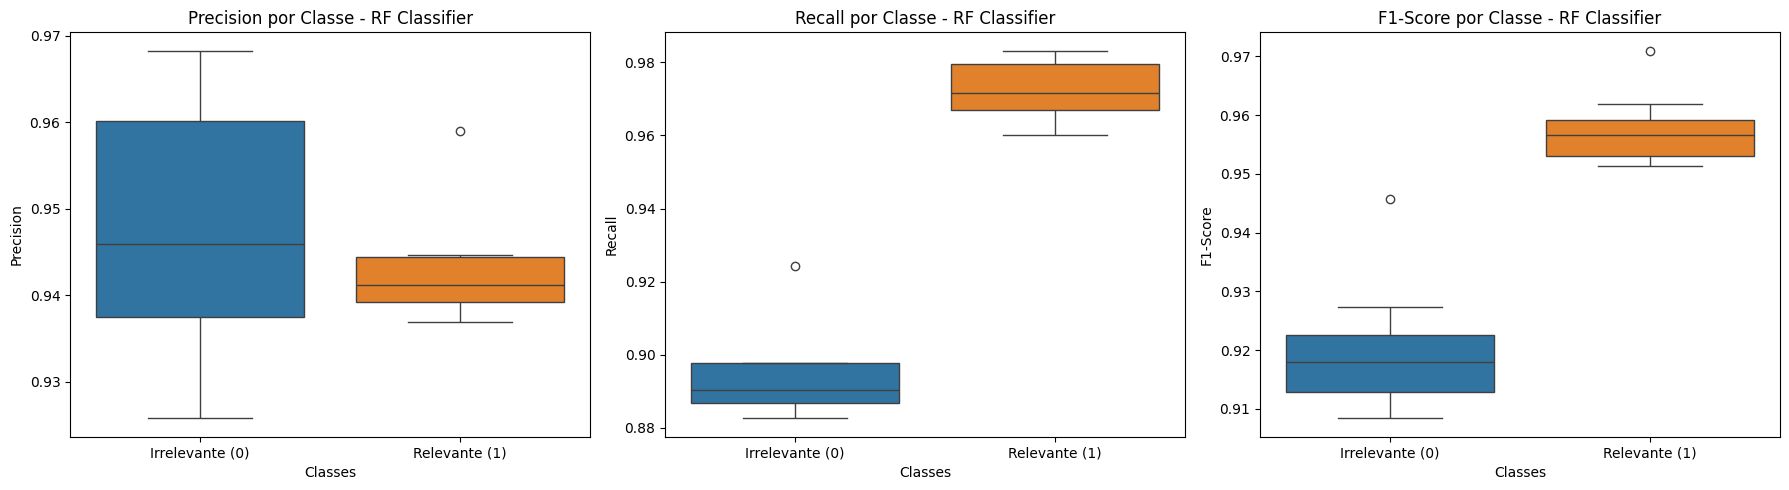

In [20]:
# Criando o modelo de RF
rf_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Definindo o K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializando listas para armazenar as métricas
precision_list = []
recall_list = []
f1_list = []

# Inicializando a variável para armazenar o melhor modelo
best_model = None
best_f1_score = 0

# Executando K-Fold Cross Validation
for train_index, test_index in kf.split(X_treino_vetorizado, y_treino):
    X_train, X_valid = X_treino_vetorizado[train_index], X_treino_vetorizado[test_index]
    y_train, y_valid = y_treino.iloc[train_index], y_treino.iloc[test_index]  # Usando .iloc para indexação

    # Treinando o modelo
    rf_clf.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = rf_clf.predict(X_valid)

    # Calculando as métricas
    precision = precision_score(y_valid, y_pred, average=None)
    recall = recall_score(y_valid, y_pred, average=None)
    f1 = f1_score(y_valid, y_pred, average=None)

    # Armazenando os resultados
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Calculando a média do F1-score e atualizando o melhor modelo se necessário
    avg_f1_score = np.mean(f1)
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_model = rf_clf  # Salvando o melhor modelo para prever no banco de teste


# Convertendo as listas em DataFrames
precision_df = pd.DataFrame(precision_list, columns=['Irrelevante (0)', 'Relevante (1)'])
recall_df = pd.DataFrame(recall_list, columns=['Irrelevante (0)', 'Relevante (1)'])
f1_df = pd.DataFrame(f1_list, columns=['Irrelevante (0)', 'Relevante (1)'])

# Plotando os boxplots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=precision_df)
plt.title('Precision por Classe - RF Classifier')
plt.xlabel('Classes')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
sns.boxplot(data=recall_df)
plt.title('Recall por Classe - RF Classifier')
plt.xlabel('Classes')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
sns.boxplot(data=f1_df)
plt.title('F1-Score por Classe - RF Classifier')
plt.xlabel('Classes')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()

Os resultados obtidos pelo Random Forest são bem parecidos com o do bagging. Vamos ver como se sai no banco de teste.

In [21]:
# Previsões no conjunto de teste
y_pred = best_model.predict(X_teste_vetorizado)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))

Acurácia: 0.9399675500270417
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.96      0.86      0.91       640
        True       0.93      0.98      0.96      1209

    accuracy                           0.94      1849
   macro avg       0.95      0.92      0.93      1849
weighted avg       0.94      0.94      0.94      1849



Feature Importance é um conceito fundamental que refere-se à técnica utilizada para quantificar a contribuição de cada feature (ou variável) em um modelo preditivo. A ideia central é entender quais variáveis têm maior impacto na previsão da variável alvo (ou rótulo) e como suas mudanças podem afetar os resultados do modelo. Vamos tentar aplicar isso no nosso melhor modelo.

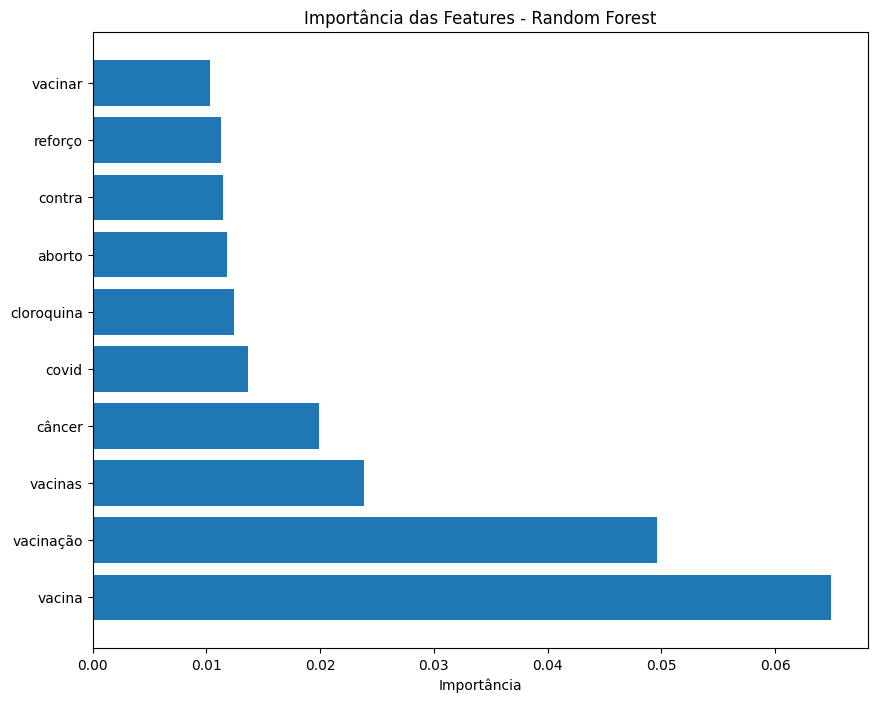

In [22]:
# Extraindo a importância das features
importances = best_model.feature_importances_

# Criando um DataFrame com as importâncias e os nomes das features
feature_names = tfidf_vectorizer.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenando as features pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])  # Exibindo as 10 mais importantes
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.show()

### Boosting

<p align="justify"> O Boosting é uma técnica de ensemble em aprendizado de máquina que visa melhorar o desempenho dos modelos de aprendizado, dando mais peso ou importância aos exemplos de treinamento que foram previamente classificados incorretamente. Essa técnica se baseia na ideia de que os modelos fracos (modelos com desempenho ligeiramente melhor do que aleatório) podem ser combinados para criar um modelo forte.

Aqui está uma explicação mais detalhada do processo de Boosting:

* <p align="justify"> Treinamento de Modelos Fracos: O processo começa com a criação de um modelo de aprendizado fraco, que pode ser qualquer algoritmo de aprendizado, como árvores de decisão, regressão logística, ou outros. Esse modelo é treinado no conjunto de treinamento original.

* <p align="justify"> Peso dos Exemplos: No início, todos os exemplos do conjunto de treinamento têm o mesmo peso. À medida que o processo de Boosting avança, os pesos são atribuídos a cada exemplo, dando mais importância aos exemplos que foram classificados incorretamente pelo modelo fraco anterior.

* <p align="justify"> Treinamento Iterativo: O modelo fraco é treinado iterativamente várias vezes. Em cada iteração, ele se concentra mais nos exemplos que foram mal classificados na iteração anterior. Isso é feito ajustando os pesos dos exemplos, de modo que os exemplos mal classificados tenham um peso maior na iteração seguinte.

* <p align="justify"> Combinação dos Modelos Fracos: À medida que mais modelos fracos são criados, suas previsões são combinadas ponderadamente para formar a previsão final. Geralmente, os modelos fracos têm diferentes pesos na previsão final, dependendo de seu desempenho durante o treinamento.

* <p align="justify"> Saída Ponderada: A previsão final é obtida através de uma votação ponderada (em problemas de classificação) ou da média ponderada (em problemas de regressão) das previsões dos modelos fracos. Isso dá origem ao modelo forte ou ensemble.

Os algoritmos de Boosting populares incluem:

1. <p align="justify"> AdaBoost (Adaptive Boosting): É um dos algoritmos de Boosting mais conhecidos. Ele ajusta os pesos dos exemplos em cada iteração, dando mais peso aos exemplos classificados incorretamente.

2. <p align="justify"> Gradient Boosting: É uma técnica mais geral que minimiza uma função de perda gradiente descendente. Exemplos populares são o Gradient Boosting, o XGBoost e o LightGBM.

3. <p align="justify"> Stochastic Gradient Boosting: É uma variação do Gradient Boosting que utiliza uma amostra aleatória de exemplos em cada iteração para melhorar a eficiência computacional.

As vantagens do Boosting incluem:

* <p align="justify"> Melhor desempenho: O Boosting geralmente leva a modelos mais precisos do que modelos individuais.
*  <p align="justify"> Redução do viés: Ao dar mais peso aos exemplos incorretamente classificados, o Boosting ajuda a reduzir o viés do modelo.
* <p align="justify"> Capacidade de lidar com dados desequilibrados: O Boosting é eficaz em problemas de classificação com classes desequilibradas, uma vez que dá mais peso às classes minoritárias.


No entanto, o Boosting pode ser sensível a ruído nos dados e, se não for cuidadosamente ajustado, pode levar ao overfitting. Portanto, a seleção adequada de hiperparâmetros e a atenção à qualidade dos dados são importantes ao aplicar técnicas de Boosting.

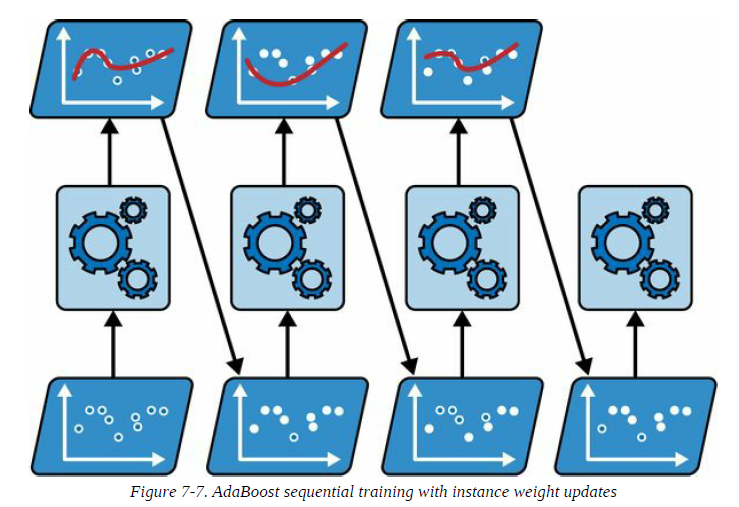

Vamos trabalhar dois métodos de boosting: o Adaboost e o Gradient boosting.

#### Adaboost

AdaBoost (Adaptive Boosting) é um algoritmo de Boosting, uma técnica de ensemble, que foi proposto por Yoav Freund e Robert Schapire em 1996. O objetivo do AdaBoost é melhorar o desempenho de modelos fracos (modelos de aprendizado que têm desempenho ligeiramente melhor do que aleatório) combinando-os de forma adaptativa. Ele faz isso atribuindo pesos diferentes aos exemplos de treinamento com base no desempenho anterior do modelo e, em seguida, combinando os modelos fracos de maneira ponderada para formar um modelo forte.

Aqui está um resumo do funcionamento do AdaBoost:

Treinamento Inicial: O AdaBoost começa com um conjunto de dados de treinamento, no qual cada exemplo inicialmente tem o mesmo peso.

Escolha de um Modelo Fraco: O algoritmo treina um modelo fraco (por exemplo, uma árvore de decisão rasa) no conjunto de treinamento. No final do treinamento, o modelo fraco é avaliado no conjunto de treinamento para determinar sua taxa de erro.

Atribuição de Peso: Com base no desempenho do modelo fraco, os exemplos de treinamento são ponderados. Exemplos que foram classificados incorretamente recebem um peso maior, para que o algoritmo se concentre mais neles na próxima iteração. Exemplos classificados corretamente recebem um peso menor.

Treinamento Iterativo: O processo é repetido por várias iterações (também chamadas de etapas ou rounds). Em cada iteração, um novo modelo fraco é treinado, e os pesos dos exemplos são atualizados.

Combinação Ponderada: Após a conclusão das iterações, os modelos fracos são combinados para formar o modelo forte final. A combinação é feita de maneira ponderada, dando mais importância aos modelos fracos que tiveram melhor desempenho durante o treinamento.

Saída do Modelo Forte: O modelo forte final é usado para fazer previsões em novos dados.

Vantagens do AdaBoost:

Geralmente, produz modelos mais precisos do que modelos individuais (modelos fracos).
Pode lidar com uma variedade de tipos de aprendizado de máquina, tornando-o flexível.
É eficaz em problemas de classificação binária e multiclasse.
Desvantagens do AdaBoost:

Pode ser sensível a outliers e ruído nos dados.
Pode levar ao overfitting se o número de iterações (rounds) for muito grande.
O AdaBoost é um algoritmo popular e amplamente utilizado no campo de aprendizado de máquina, especialmente em aplicações de visão computacional e classificação. É conhecido por sua capacidade de melhorar o desempenho dos modelos fracos e produzir modelos fortes com bom poder de generalização.

Vamos aplicar o Adaboost com um modelo fraco de decision trees no banco de treino e avaliar os resultados no banco de teste:

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Salvando o modelo
ada_default = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 30), # Tamanho máximo da árvore
                                 n_estimators = 500,
                                 learning_rate = 0.001, # Velocidade de aprendizado do modelo
                                 random_state = 42) # Garantindo a estabilidade dos resultados

ada_default.fit(X_treino_vetorizado, y_treino)

y_pred = ada_default.predict(X_teste_vetorizado)


# Avaliando o modelo

print("Accuracy:",accuracy_score(y_teste, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_teste, y_pred)}')


Accuracy: 0.9464575446187128

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       640
        True       0.98      0.94      0.96      1209

    accuracy                           0.95      1849
   macro avg       0.94      0.95      0.94      1849
weighted avg       0.95      0.95      0.95      1849



Da mesma forma que anteriormente, podemos performar o gridsearch para encontrar os melhores valores dos parâmetros (com algumas alterações no código).

[reduzi o espaço de parâmetros do grid para diminuir o tempo de processamento].

In [24]:
import warnings
warnings.filterwarnings("ignore")
import sklearn.model_selection as skm


ada2_default = AdaBoostClassifier(DecisionTreeClassifier())

parametros = {'estimator__max_depth':[i for i in range(10,30,5)], # parametro do learner base
              'n_estimators':[25,50], # parametro do adaboost
              'learning_rate':[0.01,0.1]} # parametro do adaboost


validacao = skm.ShuffleSplit(n_splits=5,
                             test_size = .20, # Tamanho para teste
                             random_state = 42)



# Definindo o grid_search
ada2_grid = skm.GridSearchCV(ada2_default,
                               parametros, # Grid de valores de a serem explorados
                               refit = True,
                               verbose = 3,
                               cv = validacao,
                               scoring = 'f1_macro')

# Retreinando o modelo com a cross-validation
ada2_grid.fit(X_treino_vetorizado, y_treino)

# Pegando o melhor score obtido
ada2_grid.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=25;, score=0.905 total time=  12.1s
[CV 2/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=25;, score=0.889 total time=  12.7s
[CV 3/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=25;, score=0.900 total time=  12.6s
[CV 4/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=25;, score=0.896 total time=  13.1s
[CV 5/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=25;, score=0.890 total time=  12.7s
[CV 1/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=50;, score=0.891 total time=  24.9s
[CV 2/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=50;, score=0.884 total time=  24.7s
[CV 3/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=50;, score=0.892 total time=  25.9s
[CV 4/5] END estimator__max_depth=10, learning_rate=0.01, n_estimators=50;, score=0

np.float64(0.9502099352802146)

Agora, vamos ver quais parâmetros nos deram o melhor resultado

In [25]:
# Obtenha o melhor valor de hiperparâmetro encontrado
best_params = ada2_grid.best_params_

# O valor de best_params conterá o dicionário com os melhores valores de hiperparâmetro
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'estimator__max_depth': 25, 'learning_rate': 0.1, 'n_estimators': 50}


Pegamos o melhor estimador e o avaliamos no banco de teste

In [26]:
# Pegando o melhor modelo

best_ada = ada2_grid.best_estimator_

# Previsão no banco de teste

y_pred = best_ada.predict(X_teste_vetorizado)

# Relatório de classificação
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.90      0.95      0.93       640
        True       0.98      0.94      0.96      1209

    accuracy                           0.95      1849
   macro avg       0.94      0.95      0.94      1849
weighted avg       0.95      0.95      0.95      1849



Tivemos uma pequena melhora, mas não muito comparado ao modelo que iniciamos. É preciso testar mais variações dos parâmetros e fazer um k-fold que nos permita ver a variação dos resultados na validação, e se são mais constantes. Vamos fazer um k-fold com os melhores parâmetros.

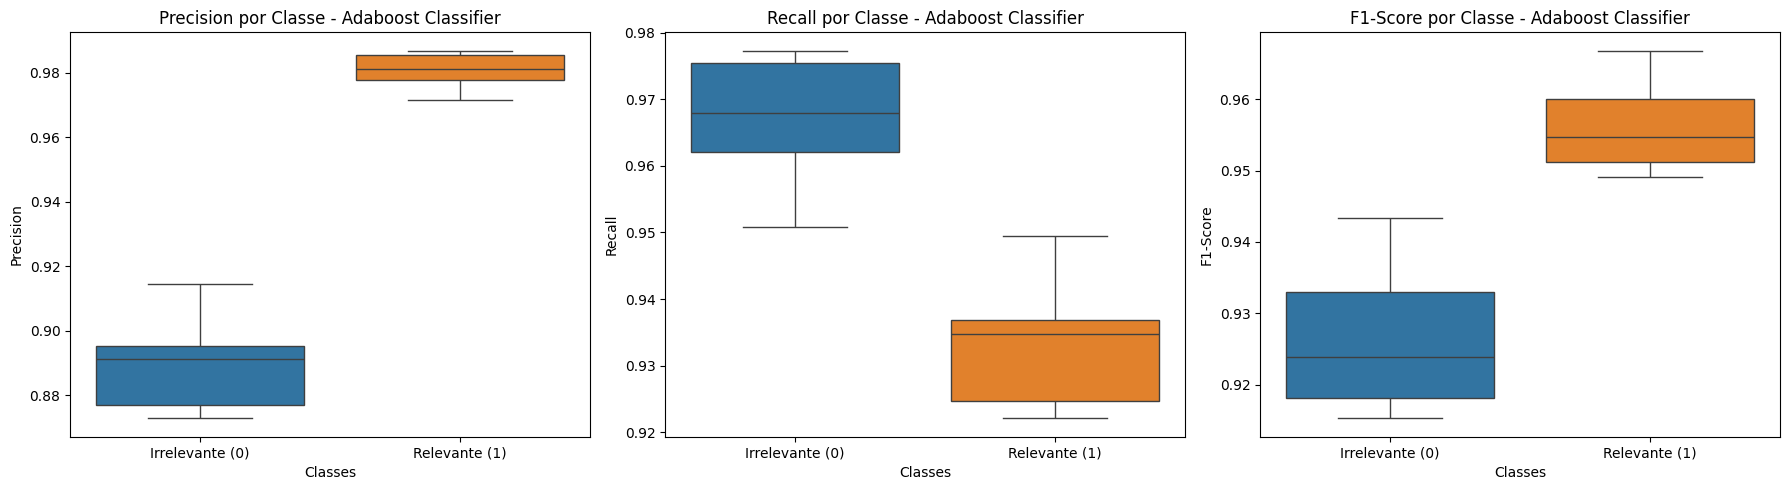

In [27]:
# Criando o modelo de Bagging
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 25), # Tamanho máximo da árvore
                                 n_estimators = 25,
                                 learning_rate = 0.01, # Velocidade de aprendizado do modelo
                                 random_state = 42)

# Definindo o K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inicializando listas para armazenar as métricas
precision_list = []
recall_list = []
f1_list = []

# Inicializando a variável para armazenar o melhor modelo
best_model = None
best_f1_score = 0

# Executando K-Fold Cross Validation
for train_index, test_index in kf.split(X_treino_vetorizado, y_treino):
    X_train, X_valid = X_treino_vetorizado[train_index], X_treino_vetorizado[test_index]
    y_train, y_valid = y_treino.iloc[train_index], y_treino.iloc[test_index]  # Usando .iloc para indexação

    # Treinando o modelo
    ada_clf.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = ada_clf.predict(X_valid)

    # Calculando as métricas
    precision = precision_score(y_valid, y_pred, average=None)
    recall = recall_score(y_valid, y_pred, average=None)
    f1 = f1_score(y_valid, y_pred, average=None)

    # Armazenando os resultados
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Calculando a média do F1-score e atualizando o melhor modelo se necessário
    avg_f1_score = np.mean(f1)
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_model = ada_clf  # Salvando o melhor modelo para prever no banco de teste


# Convertendo as listas em DataFrames
precision_df = pd.DataFrame(precision_list, columns=['Irrelevante (0)', 'Relevante (1)'])
recall_df = pd.DataFrame(recall_list, columns=['Irrelevante (0)', 'Relevante (1)'])
f1_df = pd.DataFrame(f1_list, columns=['Irrelevante (0)', 'Relevante (1)'])

# Plotando os boxplots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=precision_df)
plt.title('Precision por Classe - Adaboost Classifier')
plt.xlabel('Classes')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
sns.boxplot(data=recall_df)
plt.title('Recall por Classe - Adaboost Classifier')
plt.xlabel('Classes')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
sns.boxplot(data=f1_df)
plt.title('F1-Score por Classe - Adaboost Classifier')
plt.xlabel('Classes')
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()

#### Gradient Boosting

O Gradient Boosting é uma técnica de ensemble em aprendizado de máquina que visa melhorar o desempenho do modelo combinando vários modelos fracos (geralmente árvores de decisão) de forma sequencial e ponderada. Diferentemente do AdaBoost, o Gradient Boosting otimiza um objetivo de perda diretamente, ajustando os modelos subsequentes para minimizar os erros residuais dos modelos anteriores. É uma técnica altamente eficaz para problemas de regressão e classificação e é amplamente utilizado em competições de ciência de dados e em aplicações do mundo real.

Aqui está uma explicação mais detalhada do processo de Gradient Boosting:

Modelo Inicial: O processo começa com um modelo fraco, que pode ser um único nó de decisão ou uma árvore de decisão muito rasa. Essa é a estimativa inicial.

Cálculo dos Resíduos: Em seguida, os resíduos (diferença entre as previsões reais e as previsões do modelo atual) são calculados para cada exemplo de treinamento. O modelo subsequente é treinado para prever esses resíduos.

Construção do Próximo Modelo: Um novo modelo fraco é treinado para prever os resíduos calculados na etapa anterior. A ideia é que esse novo modelo capturará as informações deixadas de fora pelo modelo anterior.

Atualização das Previsões: As previsões anteriores e as previsões do novo modelo são combinadas para obter as previsões atualizadas. Isso é feito ponderando as previsões do novo modelo pela taxa de aprendizado (um hiperparâmetro) e adicionando essas previsões às previsões anteriores.

Repetição: Os passos 2 a 4 são repetidos várias vezes (um número definido de iterações ou até que um critério de parada seja atingido), refinando gradualmente as previsões e minimizando os erros residuais.

Saída do Modelo Final: O modelo final é a combinação ponderada de todos os modelos fracos construídos durante as iterações. Essa combinação é conhecida como modelo forte.

O Gradient Boosting é eficaz porque ajusta cada novo modelo fraco para corrigir os erros residuais do modelo anterior. Isso o torna muito poderoso para lidar com relações complexas entre as variáveis de entrada e a variável de saída. Além disso, o Gradient Boosting permite o uso de funções de perda personalizadas, o que o torna versátil para diversos tipos de problemas.

Existem várias implementações populares do Gradient Boosting, incluindo:

Gradient Boosting Machines (GBM): Implementações tradicionais, como o Scikit-Learn GradientBoostingClassifier e GradientBoostingRegressor.

XGBoost: Uma implementação otimizada do Gradient Boosting que é conhecida por sua eficiência e desempenho.

LightGBM: Outra implementação otimizada que utiliza uma técnica de histograma para treinamento mais rápido.

CatBoost: Uma implementação que lida bem com variáveis categóricas sem a necessidade de codificação.

O Gradient Boosting é uma técnica poderosa para construir modelos de aprendizado de máquina de alta qualidade, mas pode ser mais suscetível ao overfitting do que técnicas como o Random Forest, por isso a seleção adequada de hiperparâmetros é importante para obter o melhor desempenho.

Vamos aplicar um modelo de gradient boosting no banco de default.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier


# Salvando o modelo
GB_default = GradientBoostingClassifier(max_depth = 3,
                                 n_estimators = 500,
                                 learning_rate = 1, # Velocidade de aprendizado do modelo
                                 random_state = 42) # Garantindo a estabilidade dos resultados



GB_default.fit(X_treino_vetorizado, y_treino)

y_pred = GB_default.predict(X_teste_vetorizado)

# Avaliando o modelo

print("Accuracy:",accuracy_score(y_teste, y_pred))
print('')
print(f'Relatório de Classificação:\n{classification_report(y_teste, y_pred)}')


Accuracy: 0.9453758788534343

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       640
        True       0.98      0.94      0.96      1209

    accuracy                           0.95      1849
   macro avg       0.93      0.95      0.94      1849
weighted avg       0.95      0.95      0.95      1849



Os resultados não foram muito melhores que os outros modelos, vamos fazer um gridsearch para ver se conseguimos melhorar a performance do modelo:

In [29]:
validacao = skm.ShuffleSplit(n_splits=5,
                             test_size = .20, # Tamanho para teste
                             random_state = 42)

GB_grid = skm.GridSearchCV(GB_default,
                               {'n_estimators':[100, 500],
                                'learning_rate':[0.1, 1],
                                'max_depth':[10,12]},
                               refit = True,
                               cv = validacao,
                               verbose = 3,
                               scoring = 'f1_macro')


# Retreinando o modelo com a cross-validation
GB_grid.fit(X_treino_vetorizado, y_treino)

# Pegando o melhor score obtido
GB_grid.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.944 total time=  44.4s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.947 total time=  43.5s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.946 total time=  44.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.958 total time=  42.9s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100;, score=0.947 total time=  45.6s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.947 total time= 3.4min
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.945 total time= 3.6min
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.950 total time= 3.5min
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.957 total time= 3.5min
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.947

KeyboardInterrupt: 

Vamos verificar os melhores parâmetros.

In [ ]:
# Obtenha o melhor valor de hiperparâmetro encontrado
best_params = GB_grid.best_params_

# O valor de best_params conterá o dicionário com os melhores valores de hiperparâmetro
print("Melhores hiperparâmetros:", best_params)

Agora, utilizamos o melhor modelo no banco de teste

In [ ]:
# Pegando o melhor modelo

best_GB = GB_grid.best_estimator_

# Previsão no banco de teste

y_pred = best_GB.predict(X_teste_vetorizado)

# Relatório de classificação
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Os resultados não são muito melhores, mas isso se deve tanto ao desbalanceamento no banco de dados quanto ao fato de que não testamos muitas combinações de hiperparâmetros (para evitar tempo muito longo de processamento). É sempre importante conhecer bem os parâmetros que podem afetar seu modelo e testar a maior combinação de parâmetros possíveis.